# Project Planning

## 1) Description of the datasets

While the players dataset has one row for each induvidual, the session dataset has one row for each played session. One player can be part of several sessions. A hashed email in the session data set can be linked to a player via hashedEmail in the players data set.

### Players:
196 observations, 9 variables
- `experience` (chr) - the level of the player
- `subscribe` (lgl) - if the player has subscripted to the game
- `hashedEmail` (chr) - email of the player, hashed to maintain privacy
- `played_hours` (dbl) - amount of hours player has been on the server
- `name` (chr) - player's first name
- `gender` (chr) - Male, Female, Non-binary or Prefer ot to say
- `age` (dbl) - player's age
- `individualId` (lgl) - empty for all examples
- `organizationName` (lgl) - empty for all examples  

#### Issues regarding the players dataset

I can not see any directly big issues regarding the dataset, but it could be an advantage to modify it. For example, the last two columns of the dataset are unused and can be removed.

### Sessions:
1535 observations, 5 variables
- `hashedEmail` (chr) - email of the player, hashed to maintain privacy
- `start_time` (chr) - date and time when session started, on format "dd/mm/yyyy 00:00"
- `end_time` (chr) - date and time when session ended, on format "dd/mm/yyyy 00:00"
- `original_start_time` (dbl) - unix timestamp showing the original start time
- `original_end_time` (dbl) - unix timestamp showing the original start time

#### Issues regarding the sessions dataset
It seems redundant to have both `start_time` and `oiginal_start_time` and same for the end time. To check if they contain the same values, I translate the first row's oiginal_start_time with a [UNIX Timestamp Converter](https://www.epochconverter.com/) and compare it to the value of start_time:

- `start_time`: 30/06/2024 18:24
- `oiginal_start_time`: (GMT) Sunday 30. June 2024 17:53:20

As we see above, the values are not identical. Since one of the questions the owner of the datasets wants answered regards time windows, it can be problematic to use incorrect representation of the time for a session. Also, for most examples original_start_time and original_endtime have the same values, so there are some information lost there in terms of session duration. Using the start_time values has the advantage that they are human readable, but working with that format, one has to be careful to read the days, months and time in correct order.

## 2) Question 

**Stated question:** Given a time of the day, is there likely to be a peak in amount of players? (Regarding Q2)

- **Response variable:** `is_peak` (lgl)
- **Explanatory variables:**
    - experience
    - subscribe
    - played_hours
    - gender
    - age
    - time
        - instead of using start_time and end_time, I can convert them into timeslots or bins, and make features like session_duration.
  
The data will help addressing the stated question because looking at past busy timeslots, and perhaps when different types of players are logged on, we might be able to predict what time windows are peak hours i.e. have a large number of simultaneous players.

## 3) Exploratory Data Analysis and Visualization

In [3]:
library(tidyverse)
players_data <- read_csv('https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz')
sessions_data <- read_csv('https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB')
players_data
sessions_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ─────────────────────────────────

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


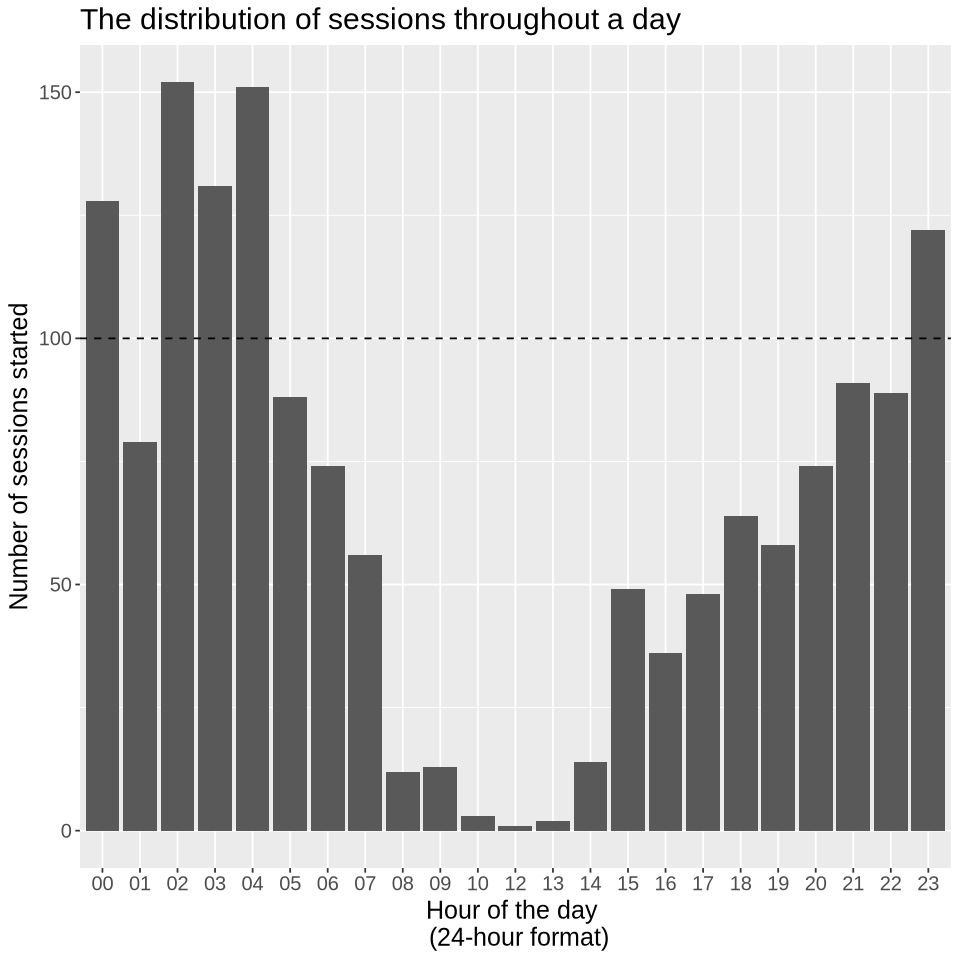

In [109]:
options(repr.plot.width = 8, repr.plot.height = 8)

barplot_number_of_sessions <- sessions_data |> 
    mutate(start_time = substr(start_time, 12, 13)) |> # Extracts hour from "dd/mm/yyyy HH:MM" 

    ggplot(aes(x=start_time)) +
    geom_bar() + 
    geom_hline(yintercept = 100, linetype = "dashed") +
    xlab("Hour of the day \n (24-hour format)") +
    ylab("Number of sessions started") +
    ggtitle("The distribution of sessions throughout a day") +
    theme(text = element_text(size = 15))

barplot_number_of_sessions

**Insight:** The horizontal line shows a possible peak threshold. The plot can also be a good indicator for prediction busy time windows.

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


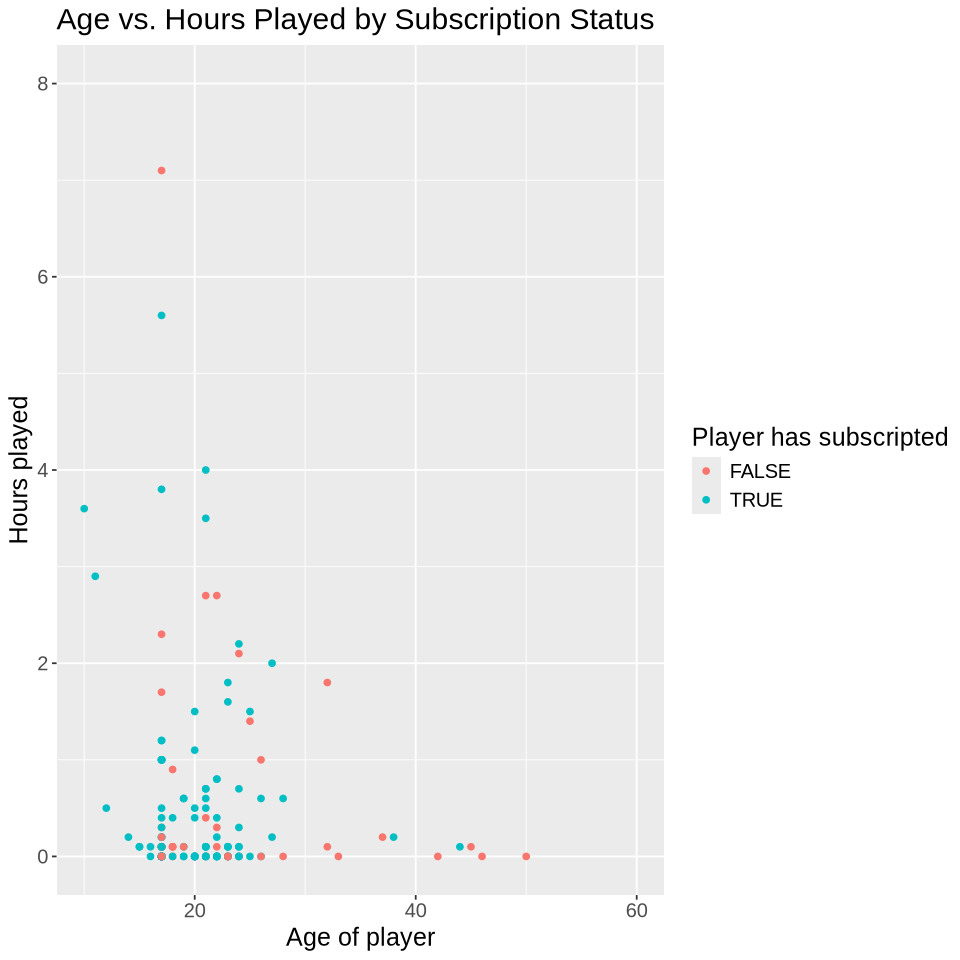

In [99]:
options(repr.plot.width = 8, repr.plot.height = 8)

players_scatterplot <- players_data |>
    select(age, subscribe, played_hours) |>
    ggplot(aes(x=age, y=played_hours, color=subscribe)) +
    geom_point() +                                  
    xlim(10, 60) + 
    ylim(0, 8) +  
    labs(x = "Age of player", y = "Hours played", color = "Player has subscripted") +
    ggtitle("Age vs. Hours Played by Subscription Status") +
    theme(text = element_text(size = 15))
    
players_scatterplot

start_time,average_session_duration,median_session_duration
<chr>,<drtn>,<drtn>
00,55 mins,34 mins
01,65 mins,34 mins
02,61 mins,54 mins
03,57 mins,39 mins
04,45 mins,28 mins
05,49 mins,35 mins
06,41 mins,11 mins
07,27 mins,7 mins
08,38 mins,12 mins


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


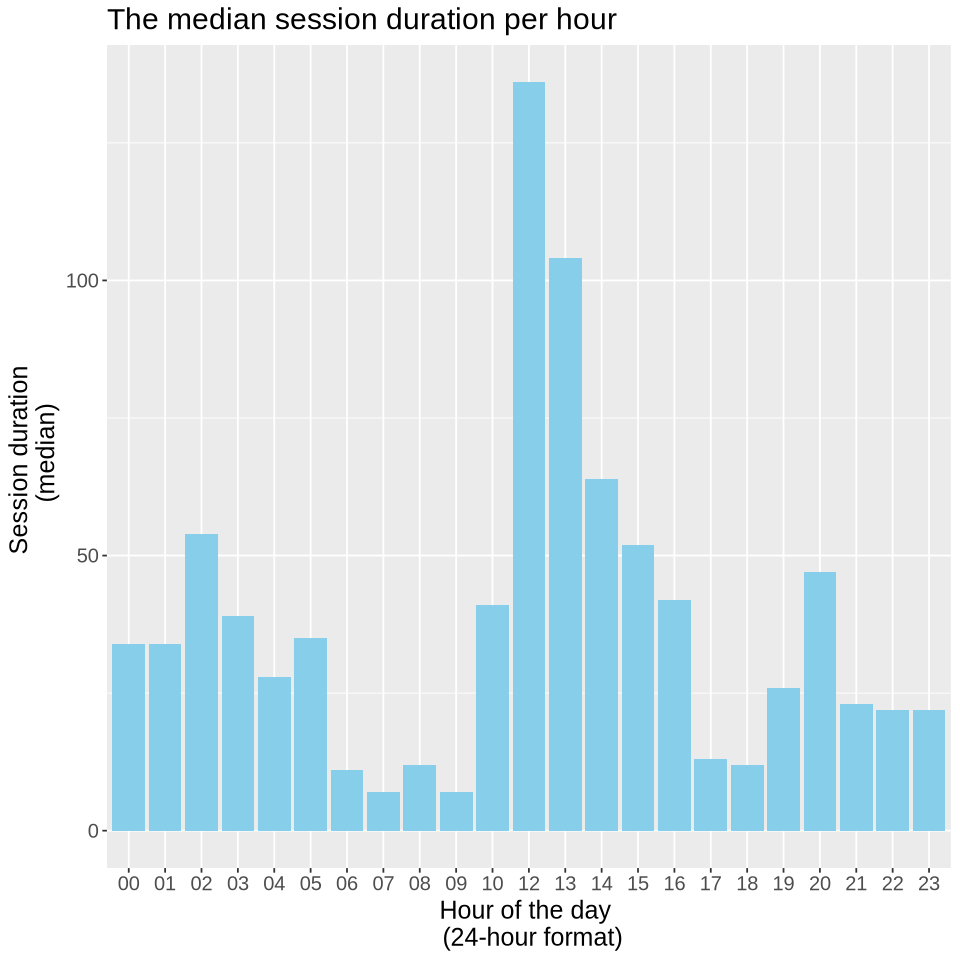

In [103]:
options(repr.plot.width = 8, repr.plot.height = 8)

sessions_data_with_duration <- sessions_data |> 
    select(hashedEmail, start_time, end_time) |>
    mutate(start_time = as.POSIXct(x=start_time, tz = "UTC", format='%d/%m/%Y %H:%M')) |>
    mutate(end_time = as.POSIXct(x=end_time, tz = "UTC", format='%d/%m/%Y %H:%M')) |>
    mutate(session_duration = end_time - start_time)

sessions_data_summarized_duration <- sessions_data_with_duration |>
    select(start_time, session_duration) |>
    mutate(start_time = format(start_time, "%H")) |>
    group_by(start_time) |>
    summarize(average_session_duration = round(mean(session_duration, na.rm=TRUE)), 
              median_session_duration = round(median(session_duration, na.rm=TRUE)))

sessions_data_summarized_duration

barplot_median_sessions <- sessions_data_summarized_duration |>
    ggplot(aes(x=start_time)) +
    geom_bar(aes(y = median_session_duration), stat = "identity", fill = "skyblue") + 
    xlab("Hour of the day \n (24-hour format)") +
    ylab("Session duration \n (median)") +
    ggtitle("The median session duration per hour") +
    theme(text = element_text(size = 15))

barplot_median_sessions

**Insight:** Most sessions last less than an hour. Comparing to the first bar chart, during midday, there are longer, but fewer sessions. So it seems reasonable to make the size of each time window to be one hour.

## 4) Methods and plan

- **Method:** K-nearest-neighbors
- **Why:** due to the way I phrased my question, this is a classification problem where i must label a given time as peak or non-peak
- **Weaknesses:** when a new datapoint is to be assigned a label, it should contain all the used explanatory features. So I have to decide how to include players characteristics, in addition to time, to predict the label of a new datapoint. Or, I might find that players characteristics are irrelevant, and rather broaden my perspective and see if for example type of weekday should be a explanatory variable. Also, knn may not perform well with to many predictors or when classes are imbalanced (which can be the case here).
- **Compare and select model:** in addition to majority classifier, comparison to the barplots above can be valuable. To choose K: accuracy from 5-fold cross validation with stratification. Forward selection to choose variables.
- **Process data:** split at the start: training 80%, test 20%. They should be balanced.
